# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
!wget https://raw.githubusercontent.com/Wayan123/dataset-ml/main/loan_prediction.csv

--2025-01-11 06:44:38--  https://raw.githubusercontent.com/Wayan123/dataset-ml/main/loan_prediction.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18131 (18K) [text/plain]
Saving to: ‘loan_prediction.csv.2’

loan_prediction.csv 100%[===================>]  17.71K  --.-KB/s    in 0.005s  

2025-01-11 06:44:38 (3.75 MB/s) - ‘loan_prediction.csv.2’ saved [18131/18131]



## Importing the dataset

In [6]:
dataset = pd.read_csv('loan_prediction.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
dataset.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
print(X_train)

[[5.649e+03 0.000e+00 4.400e+01 3.600e+02 1.000e+00]
 [2.833e+03 1.857e+03 1.260e+02 3.600e+02 1.000e+00]
 [5.532e+03 4.648e+03 1.620e+02 3.600e+02 1.000e+00]
 ...
 [5.167e+03 3.167e+03 2.000e+02 3.600e+02 1.000e+00]
 [6.033e+03 0.000e+00 1.600e+02 3.600e+02 1.000e+00]
 [4.180e+03 2.306e+03 1.820e+02 3.600e+02 1.000e+00]]


In [10]:
print(y_train)

[1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0
 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0
 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1
 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1]


In [11]:
print(X_test)

[[7.0850e+03 0.0000e+00 8.4000e+01 3.6000e+02 1.0000e+00]
 [4.2300e+03 0.0000e+00 1.1200e+02 3.6000e+02 1.0000e+00]
 [6.1330e+03 3.9060e+03 3.2400e+02 3.6000e+02 1.0000e+00]
 [4.3330e+03 2.4510e+03 1.1000e+02 3.6000e+02 1.0000e+00]
 [2.7080e+03 1.1670e+03 9.7000e+01 3.6000e+02 1.0000e+00]
 [2.6090e+03 3.4490e+03 1.6500e+02 1.8000e+02 0.0000e+00]
 [6.4170e+03 0.0000e+00 1.5700e+02 1.8000e+02 1.0000e+00]
 [1.2876e+04 0.0000e+00 4.0500e+02 3.6000e+02 1.0000e+00]
 [5.1240e+03 0.0000e+00 1.2400e+02 0.0000e+00 0.0000e+00]
 [2.0830e+03 3.1500e+03 1.2800e+02 3.6000e+02 1.0000e+00]
 [2.9170e+03 0.0000e+00 8.4000e+01 3.6000e+02 1.0000e+00]
 [2.8950e+03 0.0000e+00 9.5000e+01 3.6000e+02 1.0000e+00]
 [8.3330e+03 0.0000e+00 2.8000e+02 3.6000e+02 1.0000e+00]
 [5.0000e+03 3.6670e+03 2.3600e+02 3.6000e+02 1.0000e+00]
 [1.4880e+04 0.0000e+00 9.6000e+01 3.6000e+02 1.0000e+00]
 [3.8750e+03 0.0000e+00 6.7000e+01 3.6000e+02 1.0000e+00]
 [2.7690e+03 1.5420e+03 1.9000e+02 3.6000e+02 0.0000e+00]
 [2.3460e+03 1

In [12]:
print(y_test)

[1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 0 1 1 1 0]


## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #avoid data leakage

In [14]:
print(X_train)

[[ 0.01432867 -0.54771968 -1.05556014  0.31924724  0.54720657]
 [-0.41169991  0.10362304 -0.1644093   0.31924724  0.54720657]
 [-0.00337209  1.08256626  0.22682766  0.31924724  0.54720657]
 ...
 [-0.05859241  0.56310553  0.6398      0.31924724  0.54720657]
 [ 0.07242348 -0.54771968  0.20509227  0.31924724  0.54720657]
 [-0.20791422  0.26110979  0.44418152  0.31924724  0.54720657]]


In [15]:
print(X_test.dtype)

float64


## Training the K-NN model on the Training set

In [16]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[]#calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get first k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neighbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions


In [17]:
model=KNN(5) #our model
model.fit(X_train,y_train)

5


In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
predictions=model.predict(X_test)#our model's predictions

## Making the Confusion Matrix to compare both models

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[21 22]
 [14 97]]


0.7662337662337663

In [22]:
cm = confusion_matrix(y_test, predictions) #our model
print(cm)
accuracy_score(y_test, predictions)

[[21 22]
 [14 97]]


0.7662337662337663

## Visualising the Test set results

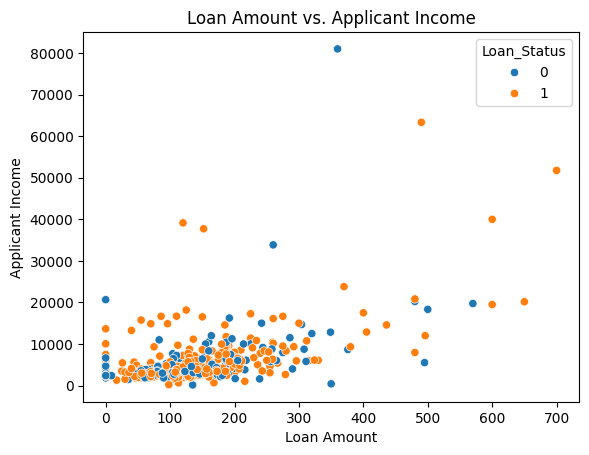

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
data = pd.read_csv('loan_prediction.csv')

sns.scatterplot(x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', data=data)
plt.title('Loan Amount vs. Applicant Income')
plt.xlabel('Loan Amount')
plt.ylabel('Applicant Income')
plt.show()